In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
from uncertainties import ufloat
import random
from uncertainties.umath import * 
from matplotlib.patches import Wedge

# Preproc data

In [34]:
### get things started
files     = []
root      = '../robotsim/atlasz/evolution/test/'
foldersin = ['MLESUCCESS_RES_linrescaled/', 'MLESUCCESS_RES_linrescaled_7param_lim10/', 'MLESUCCESS_RES_linrescaled_9param_lim5/', 'MLESUCCESS_RES_linrescaled_9param_lim10/']
fields    = set()
for fn in foldersin:
    for f in os.listdir(root + fn):
        fields.add(f.replace('.dat', '').split('_', 2)[-1])
 
folderout = root + 'MLESUCCESS_RES_linrescaled_ALL/'
if not os.path.exists(folderout):
    os.makedirs(folderout)

for field in fields:
    fout = open(folderout + 'Genetic_results_' + field + '.dat', 'w')
    fout.close()

fields = list(fields)


### merge the opt result outputs  
for folderin in foldersin:   

    fieldsin = [fff.replace('.dat', '').replace('Genetic_results_', '') for fff in os.listdir(root + folderin)]

    for field in fieldsin:
        
        ffout = open(folderout + 'Genetic_results_' + field + '.dat', 'a')
        
        for line in open(root + folderin + 'Genetic_results_' + field + '.dat'):
            
            if '7p' not in folderin:
                ffout.write(line)
            else:
                if 'maxfi' not in line:
                    

                    maxfitness, mu_p, mu_Q, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN = line.strip().split('\t')
                    record = [maxfitness, '9.99', mu_p, mu_Q, '9.99', sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN]
                    ffout.write('\t'.join(record) + '\n')   
        
        ffout.close()
        
        
### collect results and drop wrong optimizations
results = {}
for field in fields:
    
    results[field] = []

    for line in open('../robotsim/atlasz/evolution/test/MLESUCCESS_RES_linrescaled_ALL/Genetic_results_' + field + '.dat'):
    
        if 'maxfit' not in line:   
            maxfitness, mu_N, mu_p, mu_Q, sigma_N, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN = [float(aaa) for aaa in line.strip().split('\t')]
            records = [float(aaa) for aaa in line.strip().split('\t')]
            minmu     = min(mu_N, mu_p, mu_Q)
            minsigma  = min(sigma_N, sigma_Q, sigma_p)
            prodsigma = sigma_pQ * sigma_pN * sigma_QN
            maxsigma  = max([abs(sigma_pQ), abs(sigma_pN), abs(sigma_QN)])
            maxabs    = max([abs(a) for a in records[1:]])   
            
            mu_lim = 2
            if 'electro' in field:
                mu_lim = 4
            
            if mu_N > mu_lim and  minmu > 0 and minsigma > 0.5 and abs(prodsigma) > 0.0 and maxsigma < 0.25 and maxabs < 9.99:
                if maxabs != 5.0 and maxabs != 6.0 and 0.005 != minsigma:
                    results[field].append(records)          

 
names = ['maxfitness', 'mu_N', 'mu_p', 'mu_Q', 'sigma_N', 'sigma_Q', 'sigma_p', 'sigma_pQ', 'sigma_pN', 'sigma_QN']
names = [n + ''.join(int(14-len(n))*[' '])  for n in names]
print names

folderout = root + 'MLESUCCESS_RES_linrescaled_ALL_CLEANED/'
if not os.path.exists(folderout):
    os.makedirs(folderout)    
    
for field, data in results.items():
    data.sort(key=lambda tup: tup[0], reverse = True)    
    
    
for field, data in results.items():
    
    ffout = open(folderout + 'Genetic_results_' + field + '.dat', 'w')
    ffout.write('\t'.join(names) + '\n')
    
    for d in data:
        ffout.write('\t'.join([str(dd) for dd in d]) + '\n')

    print field, len(data)
    
    
    fout.close()

    

['maxfitness    ', 'mu_N          ', 'mu_p          ', 'mu_Q          ', 'sigma_N       ', 'sigma_Q       ', 'sigma_p       ', 'sigma_pQ      ', 'sigma_pN      ', 'sigma_QN      ']
theoretical_computer_science 0
space_science_or_astronomy 6
writer 1
psychology 211
art_director 3
geology 0
class 5
jazz 4
pop 1
political_science 1
hiphop 1
funk 0
folk 1
composer 0
rock 1
zoology 0
mathematics 2
prod 1
electro 0
dir 2


In [19]:
5*[0]

[0, 0, 0, 0, 0]

# Optization parameters - plot

/home/milan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


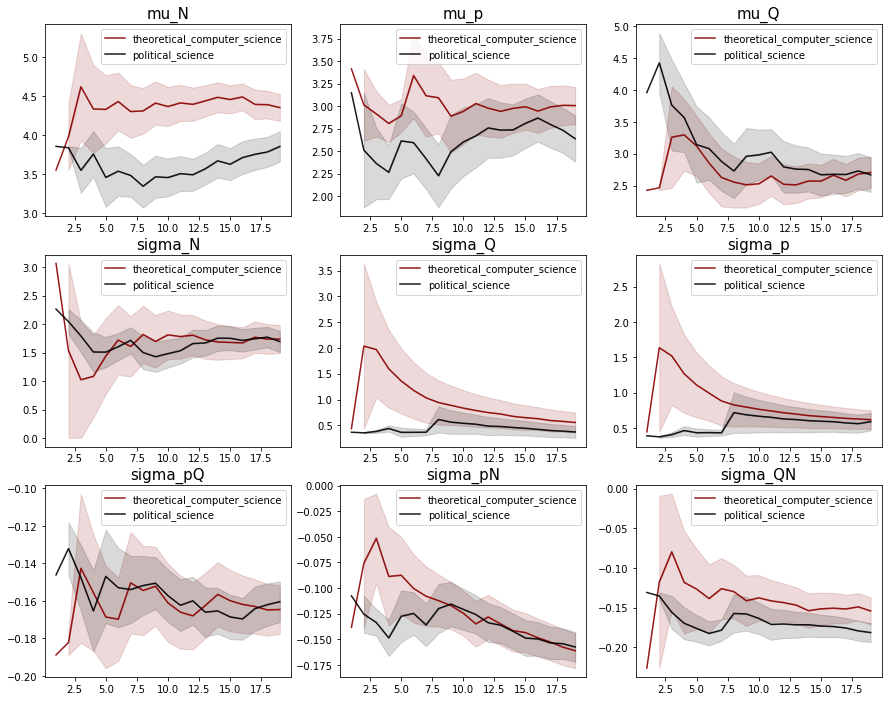

In [132]:
def get_param_iteration(index, field):

    x = []
    y = []
    yerr = []

    for maxN in range(1,20):
        
        maxfitness, mu_N, mu_p, mu_Q, sigma_N, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN = zip(*[data for data in results[field]][0:maxN])

        names = ['maxfitness', 'mu_N', 'mu_p', 'mu_Q', 'sigma_N', 'sigma_Q', 'sigma_p', 'sigma_pQ', 'sigma_pN', 'sigma_QN']
        varrs = [maxfitness, mu_N, mu_p, mu_Q, sigma_N, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN ]

        x.append(maxN)
        var = varrs[index]
        y.append(np.mean(var ))
        yerr.append(np.std(var )/ math.sqrt(len(var )-1))

    return x, y, yerr, names[index]
        

def plot_stuff(index, ax, field, colorsf):
    
    x, y, yerr, name = get_param_iteration(index, field)
    
    ax.fill_between(x, y, np.asarray(y)-np.asarray(yerr),interpolate=True, color = colorsf, alpha = 0.15)
    ax.fill_between(x, y, np.asarray(y)+np.asarray(yerr),interpolate=True, color = colorsf, alpha = 0.15)
    ax.plot(x, y, color = colorsf, alpha = 0.9, label = field)
    ax.set_title(name, fontsize = 15)
    ax.legend(loc = 'best')

f, ax    = plt.subplots(3,3, figsize = (15,12))
indicies = [(i,j) for i in range(3) for j in range(3)]
field    = 'theoretical_computer_science'
for ind in range(9): plot_stuff(ind+1, ax[indicies[ind]], field, 'darkred')
    
    
field = 'political_science'
for ind in range(9): plot_stuff(ind+1, ax[indicies[ind]], field, 'k')    
    
    

# Optimization param values - avg top N

In [133]:
def get_param_values(index, field, Nmax):

    x = []
    y = []
    yerr = []

    for maxN in range(Nmax-1,Nmax):
        
        maxfitness, mu_N, mu_p, mu_Q, sigma_N, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN = zip(*[data for data in results[field]][0:maxN])

        names = ['maxfitness', 'mu_N', 'mu_p', 'mu_Q', 'sigma_N', 'sigma_Q', 'sigma_p', 'sigma_pQ', 'sigma_pN', 'sigma_QN']
        varrs = [maxfitness, mu_N, mu_p, mu_Q, sigma_N, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN ]

        x.append(maxN)
        var = varrs[index]
        y.append(np.mean(var))
        yerr.append(np.std(var)/ math.sqrt(len(var )-1))
    
    if index == 1:
        print 'pQ : ', round(np.mean(sigma_Q) * np.mean(sigma_p), 5), round(np.mean(sigma_pQ), 5)
        print 'QN : ', round(np.mean(sigma_Q) * np.mean(sigma_N), 5), round(np.mean(sigma_QN), 5)
        print 'pN : ', round(np.mean(sigma_N) * np.mean(sigma_p), 5), round(np.mean(sigma_pN), 5), '\n'

    return names[index], '$' + str(round(y[0],3)) + ' \pm ' + str(round(yerr[0],3)) + '$'


    
field = 'prod'
Nmax  = 5
params, vals = zip(*[get_param_values(ind+1, field, Nmax+1) for ind in range(9)])

print ' & '.join(params) + '\\'
print ' & '.join(vals)   + '\\'


pQ :  9.35199 -0.19896
QN :  0.01131 -0.00715
pN :  0.01053 -0.00812 

mu_N & mu_p & mu_Q & sigma_N & sigma_Q & sigma_p & sigma_pQ & sigma_pN & sigma_QN\
$9.099 \pm 0.3$ & $3.11 \pm 0.672$ & $4.627 \pm 0.642$ & $0.004 \pm 0.001$ & $3.17 \pm 0.574$ & $2.95 \pm 0.146$ & $-0.199 \pm 0.022$ & $-0.008 \pm 0.002$ & $-0.007 \pm 0.001$\


# Luck-skill 2D plane

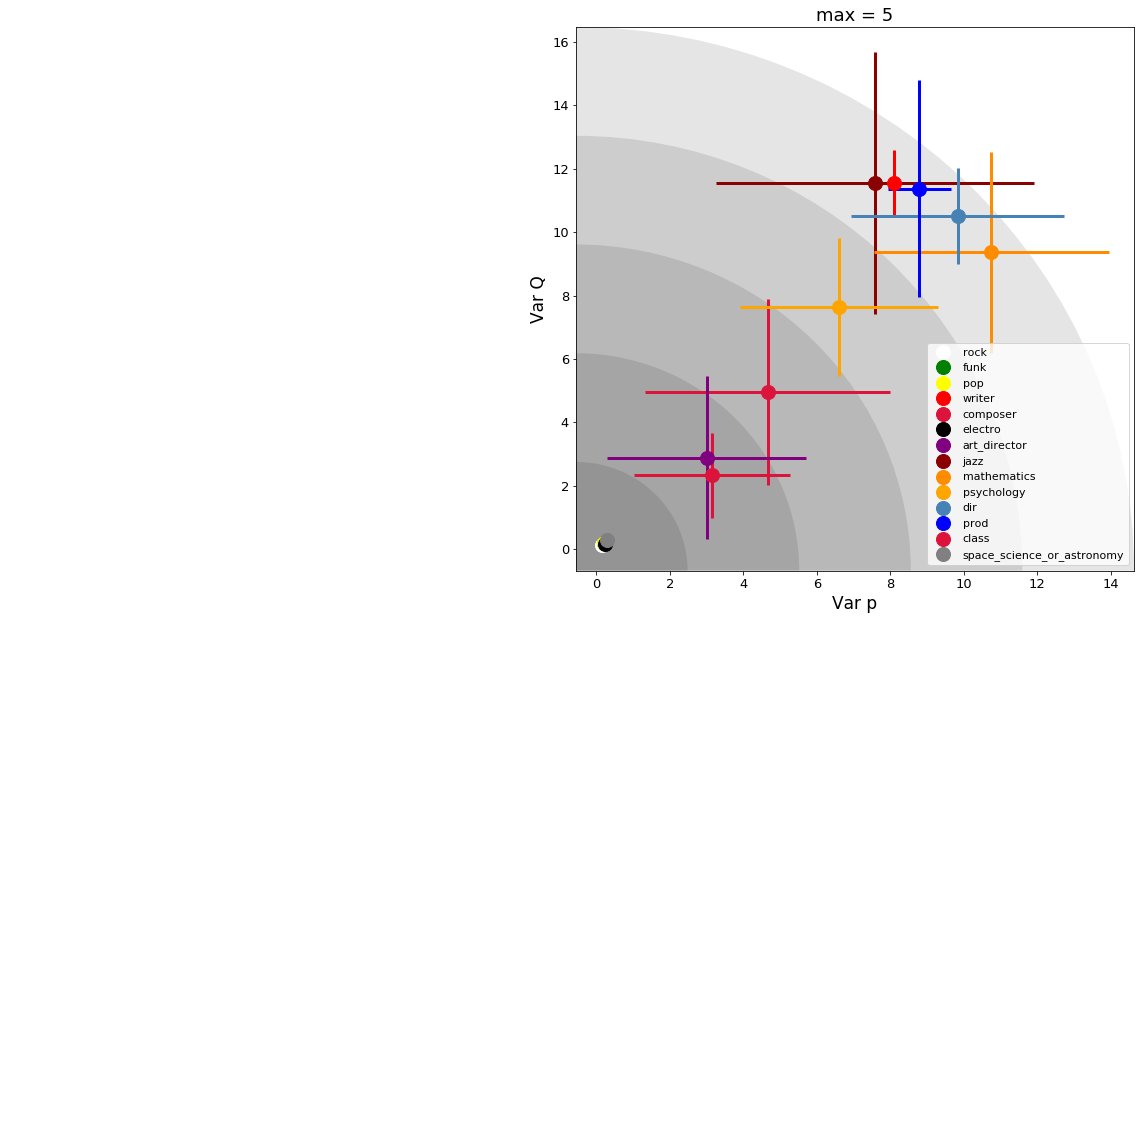

In [129]:
def get_variances(field, mini, maxi):


    maxfitness, mu_N, mu_p, mu_Q, sigma_N, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN = zip(*[data for data in results[field]][0:maxi])

    names = ['maxfitness', 'mu_N', 'mu_p', 'mu_Q', 'sigma_N', 'sigma_Q', 'sigma_p', 'sigma_pQ', 'sigma_pN', 'sigma_QN']
    varrs = [maxfitness, mu_N, mu_p, mu_Q, sigma_N, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN ]

    sigma_Q2 = [q**2 for q in sigma_Q]
    sigma_p2 = [p**2 for p in sigma_p]

    avgQ =  np.mean(sigma_Q2)
    avgp =  np.mean(sigma_p2)
    errQ =  np.std(sigma_Q2) / math.sqrt(len(sigma_Q2) - 1)
    errp =  np.std(sigma_p2) / math.sqrt(len(sigma_p2) - 1)

    x = ufloat(avgQ, errQ)  
    y = ufloat(avgp, errp)   
    z =  x / (x +  y)

    skill    = 100*z.n
    skillerr = 100*z.std_dev
           
    return avgQ, errQ, avgp, errp



def dual_half_circle(radius, alpha, angle=0, ax=None, colors=('w','k'), **kwargs):
    
    if ax is None:
        ax = plt.gca()
    kwargs.update(transform=ax.transAxes, clip_on=False)
    center = (0, 0)
    theta1, theta2 = angle, angle + 270
    w1 = Wedge(center, radius, theta1, theta2, alpha = alpha, fc=colors[0], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, alpha = alpha, fc=colors[1], **kwargs)
    for wedge in [w1, w2]:
        ax.add_artist(wedge)
    return [w1, w2]    




def do_plane_plot(ax, maxi):

    
    skill_distances = {}

    
    for field in fields:
        
        avgQ, errQ, avgp, errp = get_variances(field, 1, maxi)
        ax.errorbar( avgp, avgQ, xerr = errp, yerr = errQ, fmt = 'o', elinewidth = 3, markersize= 14, label = field, color = colorsfield[field])


        x = ufloat(avgQ, errQ)  
        y = ufloat(avgp, errp)   
        z =  -(x * y) / math.sqrt(2) 
        z = z / ((x**2 + y**2)**(0.5))

        skill_dist = (z.n, z.std_dev)
        skill_distances[field] = skill_dist


    shells = 5
    for ind in range(shells+1):
        dual_half_circle(ind/float(shells), ax = ax, angle =90,alpha = 0.1)


   # maxx = 19
   # ax.set_xlim([0,maxx])
   #ax.set_ylim([0,maxx])

    #ax.plot([0,1,maxx], [0, 1,maxx], '-k', linewidth = 3)
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(13)      
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(13)      

    #ax.set_xlabel('Var p,  ~ luck  / external fluctuations', fontsize = 14)
    #ax.set_ylabel('Var Q,  ~ skill / individual fluctuations', fontsize = 14)
    
    ax.set_xlabel('Var p', fontsize = 17)
    ax.set_ylabel('Var Q', fontsize = 17)
    
    ax.legend(loc = 'lower right', fontsize = 11)
    ax.set_title('max = ' + str(maxi), fontsize = 18)

    return skill_distances    



colorsfield = {'jazz'        : 'darkred', 
          'mathematics' : 'darkorange', 
          'psychology'  : 'orange', 
          'dir'         : 'steelblue', 
          'prod'        : 'blue',
          'class'       : 'crimson',
          'space_science_or_astronomy' : 'grey', 
          'electro': 'k', 
          'writer': 'red',
            'art_director': 'purple',
            'composer' : 'crimson',
            'pop' :  'yellow',
            'funk' : 'green', 
               'rock' : 'white'
              }

    
f, ax = plt.subplots(1,1, figsize=(10,10))
skill_distances = do_plane_plot(ax, 5)


# Luck - skill axis projection

NameError: global name 'skillerr' is not defined

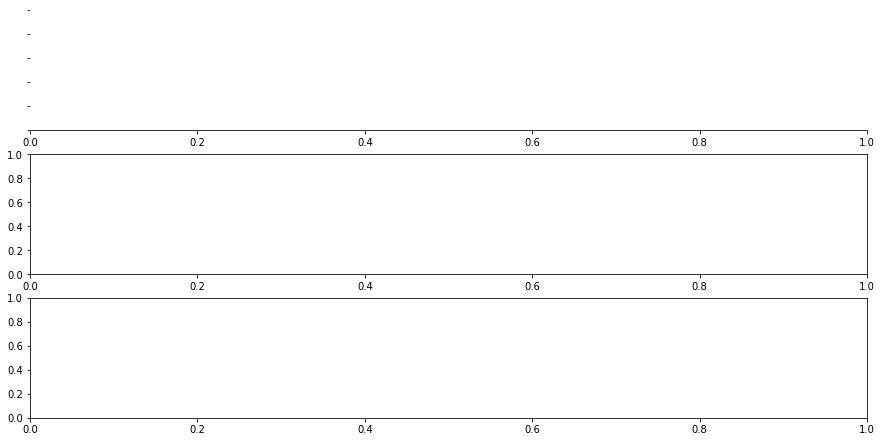

In [116]:
def get_luckskill_axis(field, maxi):

    maxfitness, mu_N, mu_p, mu_Q, sigma_N, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN = zip(*[data for data in results[field]][0:maxi])

    names = ['maxfitness', 'mu_N', 'mu_p', 'mu_Q', 'sigma_N', 'sigma_Q', 'sigma_p', 'sigma_pQ', 'sigma_pN', 'sigma_QN']
    varrs = [maxfitness, mu_N, mu_p, mu_Q, sigma_N, sigma_Q, sigma_p, sigma_pQ, sigma_pN, sigma_QN ]

    sigma_Q2 = [q**2 for q in sigma_Q]
    sigma_p2 = [p**2 for p in sigma_p]

    avgQ =  np.mean(sigma_Q2)
    avgp =  np.mean(sigma_p2)
    errQ =  np.std(sigma_Q2) / math.sqrt(len(sigma_Q2) - 1)
    errp =  np.std(sigma_p2) / math.sqrt(len(sigma_p2) - 1)

    x = ufloat(avgQ, errQ)  
    y = ufloat(avgp, errp)   
    z =  x / (x +  y)

    skill   = 100*z.n
    skiller = 100*z.std_dev
           
    return skill, skillerr



def get_axisplot(tttitle, skillz):    
    
    NNN    = 1000.0
    colors = sns.color_palette("RdBu_r", int(NNN))

    get_a_scale(ax, NNN, colors)


    ypositions  = {k : 0.0001+5*random.random() for k, v in skillz.items()}


    for ind, (title, val) in enumerate(skillz.items()):

        xcoord = val * NNN

        ax.axvline(x=xcoord, ymin=-0.5, ymax=5.5, color = 'k', linewidth = 0.5)
        ax.annotate(title, xy=(xcoord,  2), xytext=(xcoord, 4.5 + ypositions[title]), 
                    horizontalalignment = 'center', 
                    fontsize = 10,
                    color    = colors_field[title],
                    arrowprops=dict(facecolor=colors[int(xcoord)], shrink=0.01,width = 0.2),)


    ax.set_title(tttitle, fontsize = 17)
    print skillz    

    


def get_axis_plot(ax, maxi, coords):    
    
    for t in ['top','right', 'left']: ax.spines[t].set_color('white')    
    ax.set_yticklabels(['', '', '', ''])   
    
    fields  = ['writer', 'composer', 'electro', 'art_director', 'jazz', 'mathematics', 'psychology', 'dir', 'prod', 'class', 'space_science_or_astronomy']


    luck_skill = {}
    for ind, field in enumerate(fields):

        skill, skillerr   = get_luckskill_axis(field, maxi)
        luck_skill[field] = (skill, skillerr)

        ycoord = coords[ind]
    
        ax.errorbar(skill, ycoord, fmt = 'o', markersize = 12, xerr = skillerr[0], elinewidth=4, label = field, color = colorsfield[field])
        ax.annotate(field, xy=(skill,  ycoord), xytext=(skill, ycoord+0.05), horizontalalignment = 'center',  fontsize = 12, color = colorsfield[field])
    
    
    
    

ycoords = np.arange(0,1,1.0/11)
f, ax  = plt.subplots(3,1, figsize = (15,7.5))
get_axis_plot(ax[0], 5, ycoords)
ax[1].axis('off')
get_axis_plot(ax[2], 10, ycoords)

ax[0].set_xlabel('skill%, Nmax = 5',  fontsize = 20)
ax[2].set_xlabel('skill%, Nmax = 10', fontsize = 20)